# Install Requirements

To install the requirements for the project, use the following command :

`pip install -r requirements.txt`

Then install `ipykernel`

`python -m ipykernel install --user`

# I. Initialization

In [63]:
# ==============================
# Cellule 1 : IMPORT DES BIBLIOTHÈQUES
# ==============================
# Comments must be in English

import numpy as np  # For numerical computing
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.linear_model import LinearRegression  # Example: Simple linear model
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation metrics

# Set some visual parameters
sns.set(style="whitegrid", context="notebook")

print("Libraries have been imported successfully.")


Libraries have been imported successfully.


# II. Import the dataset

In [64]:
# Load the dataset from the csv file
# Method 1: Load the dataset from the csv file using the read_csv method

df = pd.read_csv('dataset/G2_Wine_Dataset.csv') # The separator is a semicolon

# Method 2 if the first did not work
# from subprocess import check_output
# print(check_output(["ls", "dataset"]).decode("utf8"))

# III. Cleaning and preparing the data

In [65]:
# Display the first 5 rows of the dataset
df.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


In [66]:
# Transform the int columns into float columns
df.drop(['Description'], axis=1, inplace=True)
df = df.dropna()
# Extract the price from the string column
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)

# Extract the alcohol concentration from the string column
df['ABV'] = df['ABV'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)

# Extract the bottle capacity from the string column
df['Capacity'] = df['Capacity'].str.extract(r'(\d+)', expand=False).astype(int)

# 3) Check for missing data
print("Missing values per column:")
print(df.isnull().sum())

# 4) Example of filling missing values for Grape or other columns if needed
# We'll just leave them for demonstration, but in real scenario you might do something like:
# df['Grape'] = df['Grape'].fillna("Unknown")

df.head()


Missing values per column:
Title                        0
Price                        0
Capacity                     0
Grape                        0
Secondary Grape Varieties    0
Closure                      0
Country                      0
Unit                         0
Characteristics              0
Per bottle / case / each     0
Type                         0
ABV                          0
Region                       0
Style                        0
Vintage                      0
Appellation                  0
dtype: int64


,Title,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
13,"Miraval Rosé 2021/22, Côtes de Provence",22.99,75,Cinsault,"Syrah, Grenache, Rolle",Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",per bottle,Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
15,"Peyrassol 'Réserve des Templiers' Rosé 2022, C...",15.99,75,Cinsault,"Syrah, Grenache",Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",per bottle,Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
18,"Caves d'Esclans 'Whispering Angel' Rosé 2022, ...",23.99,75,Grenache,"Rolle, Cinsault",Natural Cork,France,10.1,"Strawberry, Herbaceous, Peach, Raspberry",per bottle,Rosé,13.5,Provence,Delicate & Dry,2022,Côtes De Provence
27,"Château de Berne ‘Inspiration’ Rosé 2021/22, C...",17.99,75,Grenache,"Syrah, Cinsault",Natural Cork,France,9.8,"Strawberry, Herbaceous, Peach, Raspberry",per bottle,Rosé,13.0,Provence,Delicate & Dry,2022,Côtes De Provence
28,"Domaine La Chautarde Rosé 2022, Côteaux Varois...",13.99,75,Grenache,"Syrah, Carignan, Cinsault",Screwcap,France,9.8,"Strawberry, Peach, Raspberry",per bottle,Rosé,13.0,Provence,Delicate & Dry,2022,Coteaux Varois-En-Provence


Here we can see there are no rows containing `null` values. We may translate the magnesium and proline values to float to get homogeneous dataframe types

Basic statistical description of numerical columns:


,Price,Capacity,Unit,ABV
count,215.000000,215.000000,215.000000,215.000000
mean,28.552977,76.055814,10.893953,13.820930
std,29.033152,22.858293,3.033799,0.884328
min,6.990000,1.000000,4.700000,10.500000
25%,13.990000,75.000000,9.800000,13.000000
50%,18.990000,75.000000,10.500000,14.000000
75%,32.990000,75.000000,10.900000,14.500000
max,270.000000,300.000000,39.000000,18.500000


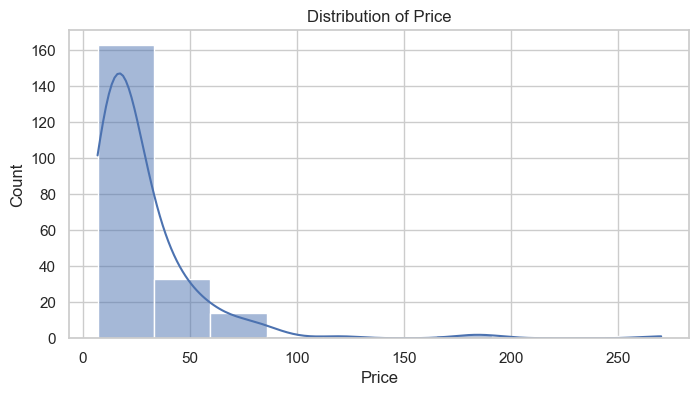

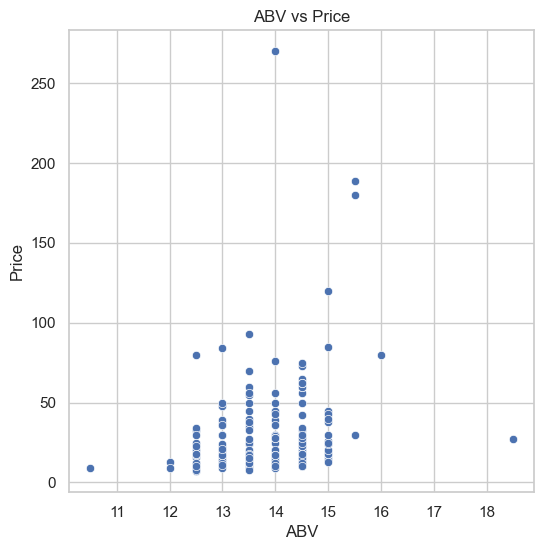

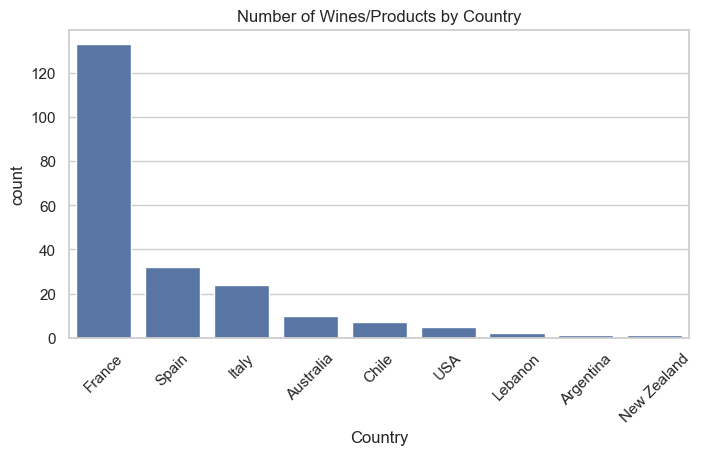

In [67]:
# ==============================
# Cellule 4 : EXPLORATION ET ANALYSE (EDA)
# ==============================
# Comments must be in English

# Let's do some basic statistical analysis
print("Basic statistical description of numerical columns:")
display(df.describe())

# Let's look at distribution of Price
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=10, kde=True)
plt.title("Distribution of Price")
plt.show()

# We can also look at ABV vs Price
plt.figure(figsize=(6,6))
sns.scatterplot(x='ABV', y='Price', data=df)
plt.title("ABV vs Price")
plt.show()

# Quick look at the number of products per country
plt.figure(figsize=(8,4))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title("Number of Wines/Products by Country")
plt.xticks(rotation=45)
plt.show()


# IV Exploratory data analysis

In [68]:
# ==============================
# Cellule 5 : MODÉLISATION DES DONNÉES (EXEMPLE SIMPLE)
# ==============================
# Comments must be in English

# We will build a simple regression model to predict Price based on ABV and Unit
# Note: This is just an illustration. Real ML pipelines might include more features.

# 1) Select the features and the target
X = df[['ABV', 'Unit']]  # Example features
y = df['Price']          # Target = Price

# 2) Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3) Create and train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predict on the test set
y_pred = model.predict(X_test)

# 5) Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("R2 Score:", r2)


Linear Regression Model
Coefficients: [8.10498973 1.32830255]
Intercept: -96.71465584516977
MSE: 291.5514128554333
R2 Score: 0.04677964790706668


Some dataset columns have a quite high correlation :

Flavanoids VS Total Phenols (86%)
Flavanoids VS OD280 (79%)

In [69]:
# ==============================
# Cellule 6 : INTERPRÉTATION DES RÉSULTATS
# ==============================
# Comments must be in English

# We can check how our predicted prices compare to actual prices
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

print("Comparison between actual and predicted prices:")
display(comparison_df)

# In a real scenario, we would interpret how well/bad the model is performing.
# We might conclude that a simple linear model with only ABV and Unit is not enough
# to predict the Price accurately, or we might add more features, do feature engineering, etc.


Comparison between actual and predicted prices:


,Actual Price,Predicted Price
0,8.99,12.499944
1,29.99,39.870009
2,83.99,60.454010
3,92.99,26.118561
4,9.99,35.286193
...,...,...
60,19.99,30.702377
61,17.99,35.286193
62,13.99,26.118561
63,17.99,30.702377


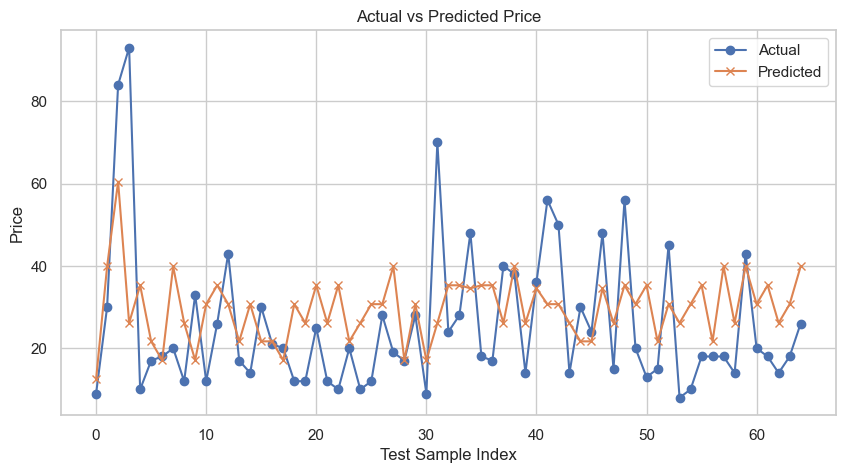

In [70]:
# ==============================
# Cellule 7 : COMMUNICATION DES RÉSULTATS
# ==============================
# Comments must be in English

# Example: a simple bar chart to compare actual vs predicted in the test set
comparison_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(comparison_df.index, comparison_df["Actual Price"], label='Actual', marker='o')
plt.plot(comparison_df.index, comparison_df["Predicted Price"], label='Predicted', marker='x')
plt.legend()
plt.title("Actual vs Predicted Price")
plt.xlabel("Test Sample Index")
plt.ylabel("Price")
plt.show()

# Recommendations:
# - Possibly add more relevant features (e.g., Region, Type, Grape).
# - Handle outliers (e.g., £300 champagne, £80 whisky).
# - Consider more advanced ML models for better accuracy.


In [71]:
# ==============================
# Cellule 8 : CONCLUSION
# ==============================
# Comments must be in English

# Conclusion:
# 1) We created a specific environment and installed required libraries.
# 2) We collected and loaded the data (in this example, we created a mock DataFrame).
# 3) We performed cleaning (removing symbols, converting data types).
# 4) We explored the data (EDA), looking at distributions and relationships.
# 5) We built a simple Linear Regression model to predict price based on ABV and Unit.
# 6) We evaluated the model and discussed potential improvements.
# 7) We generated visualizations to communicate the results and gave some recommendations.

print("End of Notebook - The analysis is complete.")


End of Notebook - The analysis is complete.
